# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [134]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_study_results = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [117]:
# Checking the number of mice.
num_mice = mouse_study_results["Mouse ID"].nunique()
print(num_mice)

249


In [118]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = mouse_study_results.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='Count')
duplicate_mice.head()

#duplicates = duplicate_mice[duplicate_mice['Count'] > 1]
duplicates


,Mouse ID,Timepoint,Count
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [119]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_G989_data = mouse_study_results[mouse_study_results["Mouse ID"] =="g989"]
mouse_G989_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [120]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_mouse_study_results = mouse_study_results.loc[(mouse_study_results["Mouse ID"] != "g989")]


In [121]:
# Checking the number of mice in the clean DataFrame.
num_cleaned_mice = cleaned_mouse_study_results["Mouse ID"].nunique()
print(f"Number of unique mice after cleaning: {num_cleaned_mice}")

Number of unique mice after cleaning: 248


## Summary Statistics

In [122]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# Group data by Drug Regimen
regimen_group = cleaned_mouse_study_results.groupby("Drug Regimen")

# Calculate statistics
mean_tumor = regimen_group["Tumor Volume (mm3)"].mean()
median_tumor = regimen_group["Tumor Volume (mm3)"].median()
variance_tumor = regimen_group["Tumor Volume (mm3)"].var()
std_tumor = regimen_group["Tumor Volume (mm3)"].std()
sem_tumor = regimen_group["Tumor Volume (mm3)"].sem()

# Combine all statistics into a single DataFrame
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": variance_tumor,
    "Tumor Volume Std. Dev.": std_tumor,
    "Tumor Volume Std. Err.": sem_tumor
})

# Display the summary DataFrame
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [123]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = regimen_group["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]) 
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

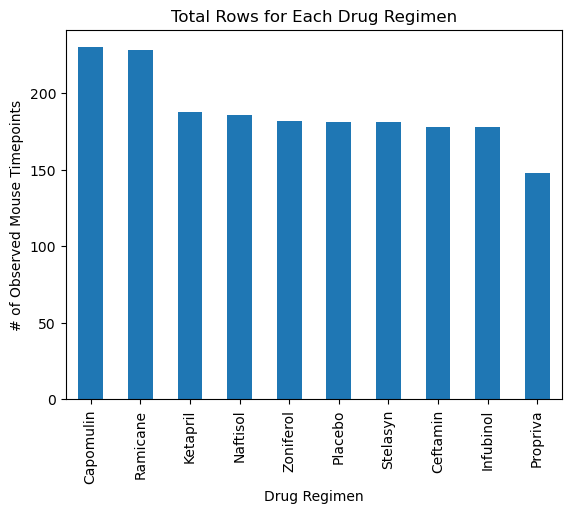

In [124]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regiment_group_size = regimen_group.size().sort_values(ascending=False)

regiment_group_size.plot(kind="bar", title="Total Rows for Each Drug Regimen", ylabel="# of Observed Mouse Timepoints", xlabel="Drug Regimen")
plt.show()


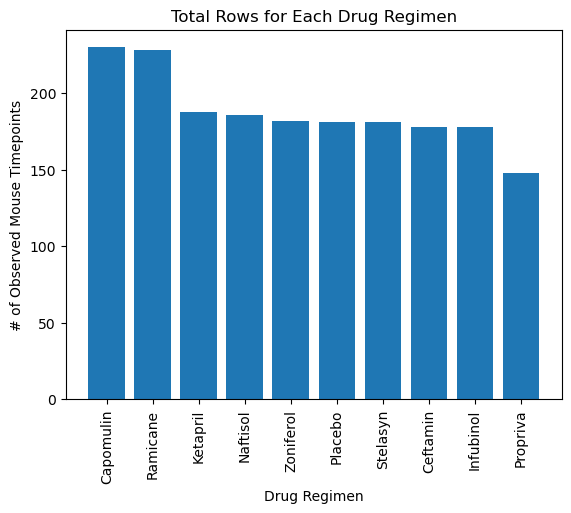

In [125]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regiment_group_size.index, regiment_group_size) 

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Rows for Each Drug Regimen")
plt.xticks(rotation=90)
plt.show()

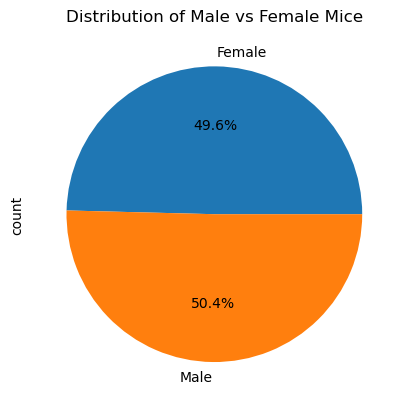

In [126]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_gender =  cleaned_mouse_study_results.groupby("Sex")["Mouse ID"].nunique()

# Make the pie chart
mouse_gender.plot.pie(autopct="%1.1f%%", title="Distribution of Male vs Female Mice", ylabel="count")
plt.show()

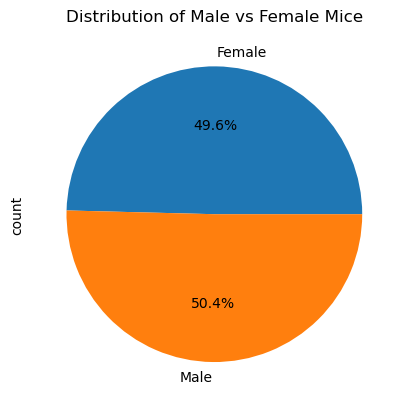

In [127]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

# Make the pie chart

plt.pie(mouse_gender, labels=mouse_gender.index, autopct="%1.1f%%")
plt.ylabel("count")
plt.title("Distribution of Male vs Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#last_timepoints = cleaned_mouse_study_results.groupby("Mouse ID")["Timepoint"].max()
last_timepoints = cleaned_mouse_study_results.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_study_results_max = pd.merge(cleaned_mouse_study_results, last_timepoints, on=["Mouse ID", "Timepoint"])
mouse_study_results_max = mouse_study_results_max.rename(columns={"Timepoint_y": "Last Timepoint"})
mouse_study_results_max.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,x336,0,45.0,0,Naftisol,Female,4,29
2,h428,0,45.0,0,Ketapril,Female,1,27
3,v199,0,45.0,0,Naftisol,Female,17,29
4,o848,0,45.0,0,Stelasyn,Female,14,27


In [129]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Filter for the selected treatments
#drug_regimen_treatment_list = mouse_study_results_max[mouse_study_results_max["Drug Regimen"].isin(treatment_list)]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Create empty dictionary to store IQR and outliers for each treatment
iqr_and_outliers = {}

# Loop through the treatment list
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = mouse_study_results_max.loc[mouse_study_results_max["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    #print(treatment_data)
    
    # add subset
    tumor_volumes.append(treatment_data)
    #print(tumor_volumes) 

    # Determine outliers using upper and lower bounds
    
    # Calculate the IQR
    q1 = treatment_data.quantile(0.25)
    q3 = treatment_data.quantile(0.75)
    iqr = q3 - q1

    # Determine outlier bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Find outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    # Store IQR and outliers in the dictionary for reference
    iqr_and_outliers[treatment] = {
        "Q1": q1,
        "Q3": q3,
        "IQR": iqr,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers": outliers.tolist() if not outliers.empty else "None"
    }

# Print the results for each treatment
    print(f"{treatment}:\n  Q1: {q1}\n  Q3: {q3}\n  IQR: {iqr}\n  Lower Bound: {lower_bound}\n  Upper Bound: {upper_bound}")
    print(f"  Outliers: {outliers.tolist() if not outliers.empty else 'None'}\n")
   

Capomulin:
  Q1: 32.37735684
  Q3: 40.1592203
  IQR: 7.781863460000004
  Lower Bound: 20.70456164999999
  Upper Bound: 51.83201549
  Outliers: None

Ramicane:
  Q1: 31.56046955
  Q3: 40.65900627
  IQR: 9.098536719999998
  Lower Bound: 17.912664470000003
  Upper Bound: 54.30681135
  Outliers: None

Infubinol:
  Q1: 54.04860769
  Q3: 65.52574285
  IQR: 11.477135160000003
  Lower Bound: 36.83290494999999
  Upper Bound: 82.74144559000001
  Outliers: [36.3213458]

Ceftamin:
  Q1: 48.72207785
  Q3: 64.29983003
  IQR: 15.577752179999997
  Lower Bound: 25.355449580000002
  Upper Bound: 87.66645829999999
  Outliers: None



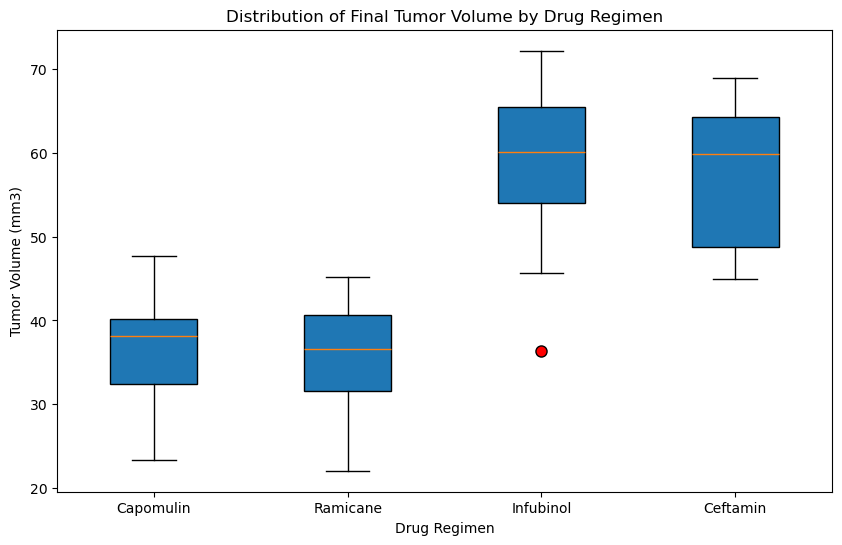

In [130]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Create the box plot
plt.figure(figsize=(10, 6))
box = plt.boxplot(tumor_volumes, tick_labels=treatment_list, patch_artist=True, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

# Add plot details
plt.title("Distribution of Final Tumor Volume by Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")

# Display the plot
plt.show()

## Line and Scatter Plots

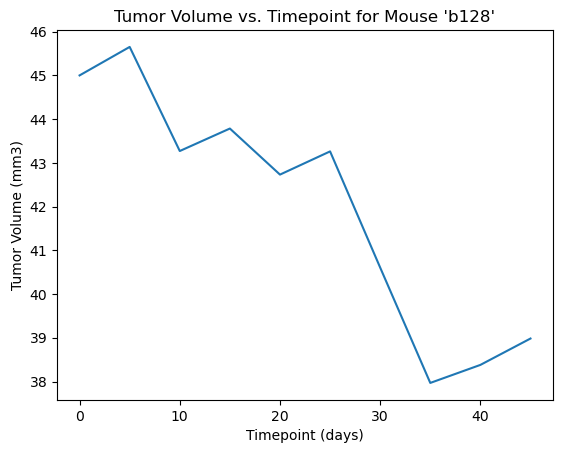

In [131]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the dataset for Capomulin treatment
capomulin_data = cleaned_mouse_study_results[cleaned_mouse_study_results["Drug Regimen"] == "Capomulin"]

# Select a single mouse for the plot
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == "b128"]

# Generate the line plot
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"])

# Add labels and title
plt.title("Tumor Volume vs. Timepoint for Mouse 'b128'")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

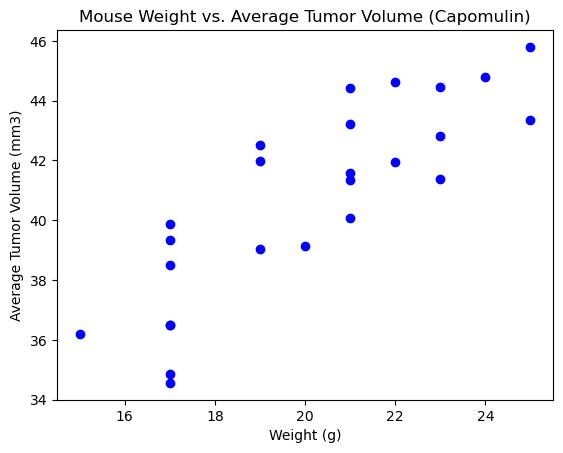

In [132]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate average tumor volume for each mouse treated with Capomulin
capomulin_avg_tumor = capomulin_data.groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean()


# Generate the scatter plot
plt.scatter(capomulin_avg_tumor["Weight (g)"], capomulin_avg_tumor["Tumor Volume (mm3)"], color="blue")

# Add labels and title
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the plot
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84
The regression line is: y = 0.95x + 21.55


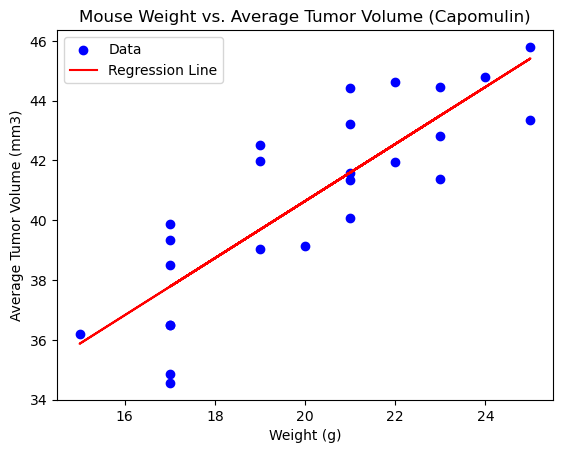

In [133]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation, _ = st.pearsonr(capomulin_avg_tumor["Weight (g)"], capomulin_avg_tumor["Tumor Volume (mm3)"])
# Print the result
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation:.2f}")

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_avg_tumor["Weight (g)"], capomulin_avg_tumor["Tumor Volume (mm3)"])

# Print the regression line equation
print(f"The regression line is: y = {slope:.2f}x + {intercept:.2f}")

# Generate the regression line data
regression_line = capomulin_avg_tumor["Weight (g)"] * slope + intercept

# Plot the scatter plot
plt.scatter(capomulin_avg_tumor["Weight (g)"], capomulin_avg_tumor["Tumor Volume (mm3)"], color="blue", label="Data")

# Plot the regression line
plt.plot(capomulin_avg_tumor["Weight (g)"], regression_line, color="red", label="Regression Line")

# Add plot details
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()

# Display the plot
plt.show()